In [4]:
import findspark
findspark.init()


In [5]:
import pyspark
import random

In [3]:
sc = pyspark.SparkContext(appName="Pi")
num_samples = 100000000

def inside(p):
    #
    x, y = random.random(), random.random()
    return x*x + y*y < 1

count = sc.parallelize(range(0, num_samples)).filter(inside).count()

pi = 4 * count / num_samples
print(pi)

sc.stop()

3.14130496


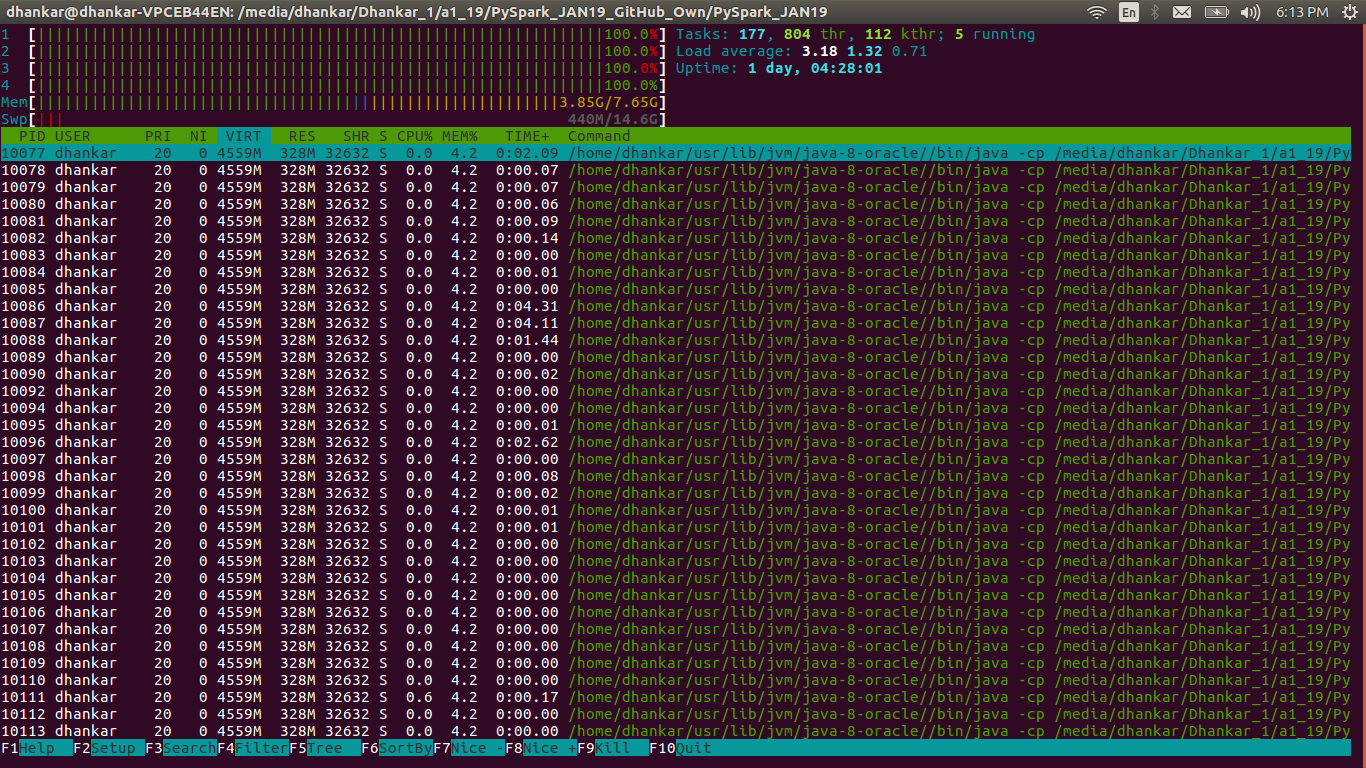

In [6]:
sc = pyspark.SparkContext(appName="Daily_Show_Test1")
 
print(sc) #

<SparkContext master=local[*] appName=Daily_Show_Test1>


In [5]:
## Dhankar >> PySpark initiated with FindSpark
# SparkContext started 
# Got CSV from 
# Converted CSV to TSV 
# Now importing data from TSV 
# raw_d == the SPARK RDD Object
# Print out top 15 Rows

raw_d = sc.textFile("dsT1.tsv")
# 
# In the above line of Code - actual Loading of CSV in RDD is Not yet Done 
# Its Done LAZILY - "as and when ABOSULUTELY required" as below - 
#

In [6]:
raw_d.take(15)

['YEAR\tGoogleKnowlege_Occupation\tShow\tGroup\tRaw_Guest_List',
 '1999\tactor\t1/11/99\tActing\tMichael J. Fox',
 '1999\tComedian\t1/12/99\tComedy\tSandra Bernhard',
 '1999\ttelevision actress\t1/13/99\tActing\tTracey Ullman',
 '1999\tfilm actress\t1/14/99\tActing\tGillian Anderson',
 '1999\tactor\t1/18/99\tActing\tDavid Alan Grier',
 '1999\tactor\t1/19/99\tActing\tWilliam Baldwin',
 '1999\tSinger-lyricist\t1/20/99\tMusician\tMichael Stipe',
 '1999\tmodel\t1/21/99\tMedia\tCarmen Electra',
 '1999\tactor\t1/25/99\tActing\tMatthew Lillard',
 '1999\tstand-up comedian\t1/26/99\tComedy\tDavid Cross',
 '1999\tactress\t1/27/99\tActing\tYasmine Bleeth',
 '1999\tactor\t1/28/99\tActing\tD. L. Hughley',
 '1999\ttelevision actress\t10/18/99\tActing\tRebecca Gayheart',
 '1999\tComedian\t10/19/99\tComedy\tSteven Wright']

In [7]:
# Using a 'map' function operate on all elements within a RDD object
# 

daily_show = raw_d.map(lambda line: line.split('\t'))
daily_show.take(5)

[['YEAR', 'GoogleKnowlege_Occupation', 'Show', 'Group', 'Raw_Guest_List'],
 ['1999', 'actor', '1/11/99', 'Acting', 'Michael J. Fox'],
 ['1999', 'Comedian', '1/12/99', 'Comedy', 'Sandra Bernhard'],
 ['1999', 'television actress', '1/13/99', 'Acting', 'Tracey Ullman'],
 ['1999', 'film actress', '1/14/99', 'Acting', 'Gillian Anderson']]

In [8]:
daily_show = raw_d.map(lambda line: line.split('99'))
daily_show.take(10)

[['YEAR\tGoogleKnowlege_Occupation\tShow\tGroup\tRaw_Guest_List'],
 ['1', '9\tactor\t1/11/', '\tActing\tMichael J. Fox'],
 ['1', '9\tComedian\t1/12/', '\tComedy\tSandra Bernhard'],
 ['1', '9\ttelevision actress\t1/13/', '\tActing\tTracey Ullman'],
 ['1', '9\tfilm actress\t1/14/', '\tActing\tGillian Anderson'],
 ['1', '9\tactor\t1/18/', '\tActing\tDavid Alan Grier'],
 ['1', '9\tactor\t1/19/', '\tActing\tWilliam Baldwin'],
 ['1', '9\tSinger-lyricist\t1/20/', '\tMusician\tMichael Stipe'],
 ['1', '9\tmodel\t1/21/', '\tMedia\tCarmen Electra'],
 ['1', '9\tactor\t1/25/', '\tActing\tMatthew Lillard']]

In [9]:
print(type(daily_show)) ## <class 'pyspark.rdd.PipelinedRDD'>

<class 'pyspark.rdd.PipelinedRDD'>


In [10]:
#reduceByKey() ##

tally = daily_show.map(lambda x: (x[0], 1)).reduceByKey(lambda x,y: x+y)
#
print(tally) #PythonRDD[9] at RDD at PythonRDD.scala:53

PythonRDD[9] at RDD at PythonRDD.scala:53


In [29]:
## Explanation ##
#%time bigger_chunk = raw_d.take(5000) 

# 1st RUN 
# CPU times: user 8 ms, sys: 8 ms, total: 16 ms
# Wall time: 274 ms


#%time bigger_chunk = raw_d.take(50000) 
# 2nd RUN
# CPU times: user 12 ms, sys: 8 ms, total: 20 ms
# Wall time: 299 ms

#%time tally.take(tally.count())
"""
CPU times: user 56 ms, sys: 0 ns, total: 56 ms
Wall time: 503 ms
"""

'\nCPU times: user 56 ms, sys: 0 ns, total: 56 ms\nWall time: 503 ms\n'

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

dates = pd.date_range('20190101', periods=30)
print(type(dates))
print("  "*90)
print(dates)

<class 'pandas.core.indexes.datetimes.DatetimeIndex'>
                                                                                                                                                                                    
DatetimeIndex(['2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04',
               '2019-01-05', '2019-01-06', '2019-01-07', '2019-01-08',
               '2019-01-09', '2019-01-10', '2019-01-11', '2019-01-12',
               '2019-01-13', '2019-01-14', '2019-01-15', '2019-01-16',
               '2019-01-17', '2019-01-18', '2019-01-19', '2019-01-20',
               '2019-01-21', '2019-01-22', '2019-01-23', '2019-01-24',
               '2019-01-25', '2019-01-26', '2019-01-27', '2019-01-28',
               '2019-01-29', '2019-01-30'],
              dtype='datetime64[ns]', freq='D')


In [8]:
df_dts = pd.DataFrame(np.random.randn(30,10), index=dates, columns=list('ABCDEFGHIJ'))
print(df_dts)

                   A         B         C         D         E         F  \
2019-01-01 -0.274021 -0.526743 -1.417882 -0.052270  0.736923  1.251460   
2019-01-02  1.019388 -0.276377 -0.086586 -0.075384 -0.469768  1.357838   
2019-01-03  0.115425  0.835901  0.174856 -0.817301  0.367212 -1.491671   
2019-01-04  0.654194 -0.375799  0.350479 -0.924795 -0.573621  1.610364   
2019-01-05 -0.690174 -0.574103 -0.019763 -1.592275 -0.051804 -0.415804   
2019-01-06 -1.428117 -1.195625  0.609043  1.912394  1.852141 -2.135954   
2019-01-07  0.327856 -0.890929  0.218548 -1.032310  0.044817  0.357085   
2019-01-08  1.141624 -2.131249  1.046434  0.459372 -0.045934  0.075732   
2019-01-09  1.350714 -0.966212  0.553683  2.154412 -0.759263 -0.027373   
2019-01-10 -0.321909 -0.598362 -0.654002 -0.816495 -0.471047 -0.666584   
2019-01-11 -1.986969 -0.532504  2.118923 -0.485428  2.603792  1.257012   
2019-01-12 -0.598720 -1.633192 -0.472679  0.773392  1.404901 -0.000833   
2019-01-13  0.667746  2.127216  0.2680

In [9]:
my_dict = {'A':199.,
           #'B':pd.Timestamp('20190101'),
           'B':pd.date_range('20190101', periods=40),
           'C':pd.Series(1,index=list(range(40)),dtype='float32'),
           'D':np.array([100]*40,dtype='int32'),
           'D_a':np.array([1000]*40,dtype='float64'),
           #'E':pd.Categorical(["Ytest","Ytrain","Xtest","Xtrain"]), # 4 hardcoded strings
           'E':np.array(["my_STR"]*40,dtype='str'),
           'F':'foo_bar'}

df2 = pd.DataFrame(my_dict)
print(df2.head(5))
print(df2.tail(5))

## my_dict_from_dict_comprehension =  {x: x**2 for x in (2, 4, 6)}

       A          B    C    D     D_a       E        F
0  199.0 2019-01-01  1.0  100  1000.0  my_STR  foo_bar
1  199.0 2019-01-02  1.0  100  1000.0  my_STR  foo_bar
2  199.0 2019-01-03  1.0  100  1000.0  my_STR  foo_bar
3  199.0 2019-01-04  1.0  100  1000.0  my_STR  foo_bar
4  199.0 2019-01-05  1.0  100  1000.0  my_STR  foo_bar
        A          B    C    D     D_a       E        F
35  199.0 2019-02-05  1.0  100  1000.0  my_STR  foo_bar
36  199.0 2019-02-06  1.0  100  1000.0  my_STR  foo_bar
37  199.0 2019-02-07  1.0  100  1000.0  my_STR  foo_bar
38  199.0 2019-02-08  1.0  100  1000.0  my_STR  foo_bar
39  199.0 2019-02-09  1.0  100  1000.0  my_STR  foo_bar


In [36]:
my_dict = {'A':199.,
           #'B':pd.Timestamp('20190101'),
           'B':pd.date_range('20190101', periods=40),
           'C':pd.Series(1,index=list(range(40)),dtype='float32'),
           'D':np.array([100]*40,dtype='int32'), ## SPARK Dtype == long (nullable = true)
           'D_a':np.array([1000]*40,dtype='float64'), ## SPARK Dtype == double (nullable = true)
           'D_b':np.random.uniform(low=0, high=40, size=(40,)), ## DEFAULT SPARK Dtype == double (nullable = true)
           'D_c':np.random.uniform(low=-100, high=100, size=(40,)), ## DEFAULT SPARK Dtype == double (nullable = true)
           #'E':pd.Categorical(["Ytest","Ytrain","Xtest","Xtrain"]), # 4 hardcoded strings
           'E':np.array(["my_STR"]*40,dtype='str'),
           'F':'foo_bar'}

df2 = pd.DataFrame(my_dict)
print(df2.head(5))
print(df2.tail(5))



       A          B    C    D     D_a        D_b        D_c       E        F
0  199.0 2019-01-01  1.0  100  1000.0   4.259934  13.199441  my_STR  foo_bar
1  199.0 2019-01-02  1.0  100  1000.0  26.578697  10.935413  my_STR  foo_bar
2  199.0 2019-01-03  1.0  100  1000.0  30.883259  34.493439  my_STR  foo_bar
3  199.0 2019-01-04  1.0  100  1000.0   1.443396  88.544454  my_STR  foo_bar
4  199.0 2019-01-05  1.0  100  1000.0  28.604473  22.817267  my_STR  foo_bar
        A          B    C    D     D_a        D_b        D_c       E        F
35  199.0 2019-02-05  1.0  100  1000.0  10.875673  46.251329  my_STR  foo_bar
36  199.0 2019-02-06  1.0  100  1000.0  13.217765 -63.030147  my_STR  foo_bar
37  199.0 2019-02-07  1.0  100  1000.0  22.675758  71.711212  my_STR  foo_bar
38  199.0 2019-02-08  1.0  100  1000.0  20.710182 -61.840822  my_STR  foo_bar
39  199.0 2019-02-09  1.0  100  1000.0  26.918973 -81.035641  my_STR  foo_bar


In [11]:
from collections import OrderedDict
## https://docs.python.org/2/library/collections.html#ordereddict-objects
## https://docs.python.org/2/library/collections.html#ordereddict-examples-and-recipes

my_dict_from_dict_comprehension =  OrderedDict({x: x**5 for x in (1, 5, 10)}).__class__
my_ORDERED_dict_from_dict_comprehension =  OrderedDict({x: x**5 for x in (1, 5, 10)})
my_dict_from_dict_comprehension1 =  {x: x*5 for x in (1, 5, 10 , 20 , 33)}
my_dict_from_dict_comprehension_class =  {x: x*5 for x in (1, 5, 10 , 20 , 33)}.__class__
#
print(my_dict_from_dict_comprehension) ## Doesnt give an ORDERED DICT ?
print(" "*90)
print(my_dict_from_dict_comprehension1) ## Doesnt give an ORDERED DICT ?
print(" "*90)
print(my_dict_from_dict_comprehension_class) #.__class__ ## Chained above with DOT Notation 
print(" "*90)
print(my_ORDERED_dict_from_dict_comprehension) # OrderedDict([(1, 1), (10, 100000), (5, 3125)])

<class 'collections.OrderedDict'>
                                                                                          
{1: 5, 10: 50, 20: 100, 5: 25, 33: 165}
                                                                                          
<class 'dict'>
                                                                                          
OrderedDict([(1, 1), (10, 100000), (5, 3125)])


In [37]:
print("The DATA Types ---\n\n", df2.dtypes)

The DATA Types ---

 A             float64
B      datetime64[ns]
C             float32
D               int32
D_a           float64
D_b           float64
D_c           float64
E              object
F              object
dtype: object


In [38]:
df2.columns

Index(['A', 'B', 'C', 'D', 'D_a', 'D_b', 'D_c', 'E', 'F'], dtype='object')

In [39]:
print(df2.values[2]) ## Numpy Array of "values" - print the 2nd RECORD
#
print("   "*90)
print(df2.values[3]) ## Numpy Array of "values" - print the 3rd RECORD
#
print("   "*90)
print(df2.values[3:5]) ## Numpy Array of "values" - print the 3rd RECORD

[199.0 Timestamp('2019-01-03 00:00:00') 1.0 100 1000.0 30.883258934544383
 34.49343921968767 'my_STR' 'foo_bar']
                                                                                                                                                                                                                                                                              
[199.0 Timestamp('2019-01-04 00:00:00') 1.0 100 1000.0 1.443395958291327
 88.54445359138737 'my_STR' 'foo_bar']
                                                                                                                                                                                                                                                                              
[[199.0 Timestamp('2019-01-04 00:00:00') 1.0 100 1000.0 1.443395958291327
  88.54445359138737 'my_STR' 'foo_bar']
 [199.0 Timestamp('2019-01-05 00:00:00') 1.0 100 1000.0
  28.604472974851415 22.817266950362438 'my_STR' 'foo_bar']]


In [40]:
print(df2.describe)

<bound method NDFrame.describe of         A          B    C    D     D_a        D_b        D_c       E        F
0   199.0 2019-01-01  1.0  100  1000.0   4.259934  13.199441  my_STR  foo_bar
1   199.0 2019-01-02  1.0  100  1000.0  26.578697  10.935413  my_STR  foo_bar
2   199.0 2019-01-03  1.0  100  1000.0  30.883259  34.493439  my_STR  foo_bar
3   199.0 2019-01-04  1.0  100  1000.0   1.443396  88.544454  my_STR  foo_bar
4   199.0 2019-01-05  1.0  100  1000.0  28.604473  22.817267  my_STR  foo_bar
5   199.0 2019-01-06  1.0  100  1000.0   1.546117 -75.137443  my_STR  foo_bar
6   199.0 2019-01-07  1.0  100  1000.0   9.433286 -10.111833  my_STR  foo_bar
7   199.0 2019-01-08  1.0  100  1000.0  18.338019 -61.566053  my_STR  foo_bar
8   199.0 2019-01-09  1.0  100  1000.0  21.607442 -87.060408  my_STR  foo_bar
9   199.0 2019-01-10  1.0  100  1000.0   1.018799  58.727274  my_STR  foo_bar
10  199.0 2019-01-11  1.0  100  1000.0   8.982050  59.780313  my_STR  foo_bar
11  199.0 2019-01-12  1.0  100

In [41]:
%time print(df2.T) # Transpose

                      0                    1                    2   \
A                    199                  199                  199   
B    2019-01-01 00:00:00  2019-01-02 00:00:00  2019-01-03 00:00:00   
C                      1                    1                    1   
D                    100                  100                  100   
D_a                 1000                 1000                 1000   
D_b              4.25993              26.5787              30.8833   
D_c              13.1994              10.9354              34.4934   
E                 my_STR               my_STR               my_STR   
F                foo_bar              foo_bar              foo_bar   

                      3                    4                    5   \
A                    199                  199                  199   
B    2019-01-04 00:00:00  2019-01-05 00:00:00  2019-01-06 00:00:00   
C                      1                    1                    1   
D                  

In [42]:
%time print(df2.sort_values(by='B',ascending=False)) ## SORTS - in Descending order of DATES in COL - B 

        A          B    C    D     D_a        D_b        D_c       E        F
39  199.0 2019-02-09  1.0  100  1000.0  26.918973 -81.035641  my_STR  foo_bar
38  199.0 2019-02-08  1.0  100  1000.0  20.710182 -61.840822  my_STR  foo_bar
37  199.0 2019-02-07  1.0  100  1000.0  22.675758  71.711212  my_STR  foo_bar
36  199.0 2019-02-06  1.0  100  1000.0  13.217765 -63.030147  my_STR  foo_bar
35  199.0 2019-02-05  1.0  100  1000.0  10.875673  46.251329  my_STR  foo_bar
34  199.0 2019-02-04  1.0  100  1000.0  20.882653 -78.548298  my_STR  foo_bar
33  199.0 2019-02-03  1.0  100  1000.0  18.769033  88.410813  my_STR  foo_bar
32  199.0 2019-02-02  1.0  100  1000.0  38.362984 -48.884021  my_STR  foo_bar
31  199.0 2019-02-01  1.0  100  1000.0  17.303685  66.671929  my_STR  foo_bar
30  199.0 2019-01-31  1.0  100  1000.0  22.895632  -4.511398  my_STR  foo_bar
29  199.0 2019-01-30  1.0  100  1000.0  27.939217  70.647018  my_STR  foo_bar
28  199.0 2019-01-29  1.0  100  1000.0   6.804958 -76.515165  my

In [43]:
## Create a SPARK DF from Pandas DF 

from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()

%time df2_spark = spark.createDataFrame(df2)


CPU times: user 40 ms, sys: 0 ns, total: 40 ms
Wall time: 107 ms


In [44]:
print(type(df2_spark)) ## <class 'pyspark.sql.dataframe.DataFrame'>
#
print("  "*90)
#
print(df2_spark.show())

<class 'pyspark.sql.dataframe.DataFrame'>
                                                                                                                                                                                    
+-----+-------------------+---+---+------+------------------+-------------------+------+-------+
|    A|                  B|  C|  D|   D_a|               D_b|                D_c|     E|      F|
+-----+-------------------+---+---+------+------------------+-------------------+------+-------+
|199.0|2019-01-01 00:00:00|1.0|100|1000.0| 4.259933692159192| 13.199441059561877|my_STR|foo_bar|
|199.0|2019-01-02 00:00:00|1.0|100|1000.0| 26.57869749948212|  10.93541258455221|my_STR|foo_bar|
|199.0|2019-01-03 00:00:00|1.0|100|1000.0|30.883258934544383|  34.49343921968767|my_STR|foo_bar|
|199.0|2019-01-04 00:00:00|1.0|100|1000.0| 1.443395958291327|  88.54445359138737|my_STR|foo_bar|
|199.0|2019-01-05 00:00:00|1.0|100|1000.0|28.604472974851415| 22.817266950362438|my_STR|foo_bar|
|

In [45]:
df2_spark.printSchema() ## DATA TYPES stored in SPARK

root
 |-- A: double (nullable = true)
 |-- B: timestamp (nullable = true)
 |-- C: double (nullable = true)
 |-- D: long (nullable = true)
 |-- D_a: double (nullable = true)
 |-- D_b: double (nullable = true)
 |-- D_c: double (nullable = true)
 |-- E: string (nullable = true)
 |-- F: string (nullable = true)



In [46]:
## SELECT Columns 
spark_col_names = ['A','C','D_a','D_b']
df2_spark.select(spark_col_names).show(3)

+-----+---+------+------------------+
|    A|  C|   D_a|               D_b|
+-----+---+------+------------------+
|199.0|1.0|1000.0| 4.259933692159192|
|199.0|1.0|1000.0| 26.57869749948212|
|199.0|1.0|1000.0|30.883258934544383|
+-----+---+------+------------------+
only showing top 3 rows



In [25]:
## FILTER same as the WHERE Clause from SQL

df2_spark.filter(df2_spark.B == '2019-01-06 00:00:00').show()
## SHOWS only ONE ROW where we have the TIMESTAMP - in COLUMN B == 2019-01-06 00:00:00

+-----+-------------------+---+---+------+------+-------+
|    A|                  B|  C|  D|   D_a|     E|      F|
+-----+-------------------+---+---+------+------+-------+
|199.0|2019-01-06 00:00:00|1.0|100|1000.0|my_STR|foo_bar|
+-----+-------------------+---+---+------+------+-------+



In [26]:
df2_spark.filter(df2_spark.B == '2019-01-06').show()  ## PARTIAL String Match within Column B ??

+-----+-------------------+---+---+------+------+-------+
|    A|                  B|  C|  D|   D_a|     E|      F|
+-----+-------------------+---+---+------+------+-------+
|199.0|2019-01-06 00:00:00|1.0|100|1000.0|my_STR|foo_bar|
+-----+-------------------+---+---+------+------+-------+



In [28]:
df2_spark.filter(df2_spark.B == '2019-01').show() ## Not OK ## PARTIAL String Match within Column B ??

+-----+-------------------+---+---+------+------+-------+
|    A|                  B|  C|  D|   D_a|     E|      F|
+-----+-------------------+---+---+------+------+-------+
|199.0|2019-01-01 00:00:00|1.0|100|1000.0|my_STR|foo_bar|
+-----+-------------------+---+---+------+------+-------+



In [47]:
df2_spark.filter("B == '2019-01'").show() # Note the DOUBLE QUOTES 

+-----+-------------------+---+---+------+-----------------+------------------+------+-------+
|    A|                  B|  C|  D|   D_a|              D_b|               D_c|     E|      F|
+-----+-------------------+---+---+------+-----------------+------------------+------+-------+
|199.0|2019-01-01 00:00:00|1.0|100|1000.0|4.259933692159192|13.199441059561877|my_STR|foo_bar|
+-----+-------------------+---+---+------+-----------------+------------------+------+-------+



In [49]:
## Data Bricks --- SparkML --- Orange telecom CHURN Prediction data
## SOURCE -- https://github.com/databricks/spark-csv#python-api

from pyspark.sql import SQLContext
sqlContext = SQLContext(sc)

CV_data = sqlContext.read.load('./churn-bigml-80.csv', 
                          format='com.databricks.spark.csv', 
                          header='true', 
                          inferSchema='true')

In [50]:
print(type(CV_data))

<class 'pyspark.sql.dataframe.DataFrame'>


In [52]:
CV_data.show(3)

+-----+--------------+---------+------------------+---------------+---------------------+-----------------+---------------+----------------+-----------------+---------------+----------------+-------------------+-----------------+------------------+------------------+----------------+-----------------+----------------------+-----+
|State|Account length|Area code|International plan|Voice mail plan|Number vmail messages|Total day minutes|Total day calls|Total day charge|Total eve minutes|Total eve calls|Total eve charge|Total night minutes|Total night calls|Total night charge|Total intl minutes|Total intl calls|Total intl charge|Customer service calls|Churn|
+-----+--------------+---------+------------------+---------------+---------------------+-----------------+---------------+----------------+-----------------+---------------+----------------+-------------------+-----------------+------------------+------------------+----------------+-----------------+----------------------+-----+
|   

In [53]:
CV_data.columns

['State',
 'Account length',
 'Area code',
 'International plan',
 'Voice mail plan',
 'Number vmail messages',
 'Total day minutes',
 'Total day calls',
 'Total day charge',
 'Total eve minutes',
 'Total eve calls',
 'Total eve charge',
 'Total night minutes',
 'Total night calls',
 'Total night charge',
 'Total intl minutes',
 'Total intl calls',
 'Total intl charge',
 'Customer service calls',
 'Churn']

In [54]:
CV_data.printSchema()

root
 |-- State: string (nullable = true)
 |-- Account length: integer (nullable = true)
 |-- Area code: integer (nullable = true)
 |-- International plan: string (nullable = true)
 |-- Voice mail plan: string (nullable = true)
 |-- Number vmail messages: integer (nullable = true)
 |-- Total day minutes: double (nullable = true)
 |-- Total day calls: integer (nullable = true)
 |-- Total day charge: double (nullable = true)
 |-- Total eve minutes: double (nullable = true)
 |-- Total eve calls: integer (nullable = true)
 |-- Total eve charge: double (nullable = true)
 |-- Total night minutes: double (nullable = true)
 |-- Total night calls: integer (nullable = true)
 |-- Total night charge: double (nullable = true)
 |-- Total intl minutes: double (nullable = true)
 |-- Total intl calls: integer (nullable = true)
 |-- Total intl charge: double (nullable = true)
 |-- Customer service calls: integer (nullable = true)
 |-- Churn: boolean (nullable = true)



In [56]:
## SELECT Columns --- after seeing them with --- .printSchema()
spark_col_names = ['International plan','State','Customer service calls','Churn']
CV_data.select(spark_col_names).show(10)

+------------------+-----+----------------------+-----+
|International plan|State|Customer service calls|Churn|
+------------------+-----+----------------------+-----+
|                No|   KS|                     1|false|
|                No|   OH|                     1|false|
|                No|   NJ|                     0|false|
|               Yes|   OH|                     2|false|
|               Yes|   OK|                     3|false|
|               Yes|   AL|                     0|false|
|                No|   MA|                     3|false|
|               Yes|   MO|                     0|false|
|               Yes|   WV|                     0|false|
|                No|   RI|                     0|false|
+------------------+-----+----------------------+-----+
only showing top 10 rows



In [ ]:
## 
spark_col_names = ['International plan','State','Customer service calls','Churn']
CV_data.select(spark_col_names).show(10)

In [59]:
spark_col_names = ['International plan','State','Customer service calls','Churn']

CV_data.select(spark_col_names).filter("Churn == 'true'").show(30) #
# DOT Notation Chained --- SELECT and FILTER
#Note the DOUBLE QUOTES 

+------------------+-----+----------------------+-----+
|International plan|State|Customer service calls|Churn|
+------------------+-----+----------------------+-----+
|                No|   CO|                     5| true|
|                No|   AZ|                     1| true|
|               Yes|   MD|                     0| true|
|                No|   WY|                     5| true|
|                No|   CO|                     3| true|
|                No|   TX|                     4| true|
|                No|   DC|                     0| true|
|                No|   NY|                     4| true|
|                No|   TX|                     2| true|
|                No|   IN|                     4| true|
|                No|   NJ|                     1| true|
|                No|   MS|                     1| true|
|               Yes|   ME|                     0| true|
|                No|   NV|                     1| true|
|                No|   MS|                     4

In [61]:
## pyspark.sql.functions.array_max(col)
##
from pyspark.sql.functions import *

dfMAX = spark.createDataFrame([([2, 1, 3],), ([None, 10, -1],)], ['data'])
dfMAX.select(array_max(dfMAX.data).alias('max')).collect()
#[Row(max=3), Row(max=10)]

[Row(max=3), Row(max=10)]

In [62]:
## pyspark.sql.functions.array_max(col)
##


dfMAX = spark.createDataFrame([([2, 1000, 3],), ([None, 4000, -1],)], ['data'])
dfMAX.select(array_max(dfMAX.data).alias('max')).collect()
#[Row(max=1000), Row(max=4000)]

[Row(max=1000), Row(max=4000)]